In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")

In [4]:
# Data Cleaning
# Drop Id column as it's not a feature
data = data.drop('Id', axis=1)

# Handling categorical variables
le = LabelEncoder()
categorical_cols = ['Location', 'Condition', 'Garage']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Checking for missing values
data.replace('?', np.nan, inplace=True)
data.fillna(data.median(), inplace=True)


In [5]:
# Exploratory Data Analysis
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())
print("\nSummary Statistics:\n", data.describe())


Dataset Shape: (2000, 9)

First 5 Rows:
    Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  Garage  \
0  1360         5          4       3       1970         0          0       0   
1  4272         5          4       3       1958         0          0       0   
2  3592         2          2       3       1938         0          2       0   
3   966         4          2       2       1902         2          1       1   
4  4926         1          4       2       1975         0          1       1   

    Price  
0  149919  
1  424998  
2  266746  
3  244020  
4  636056  

Summary Statistics:
               Area     Bedrooms   Bathrooms       Floors    YearBuilt  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean   2786.209500     3.003500     2.55250     1.993500  1961.446000   
std    1295.146799     1.424606     1.10899     0.809188    35.926695   
min     501.000000     1.000000     1.00000     1.000000  1900.000000   
25%    1653.000000 

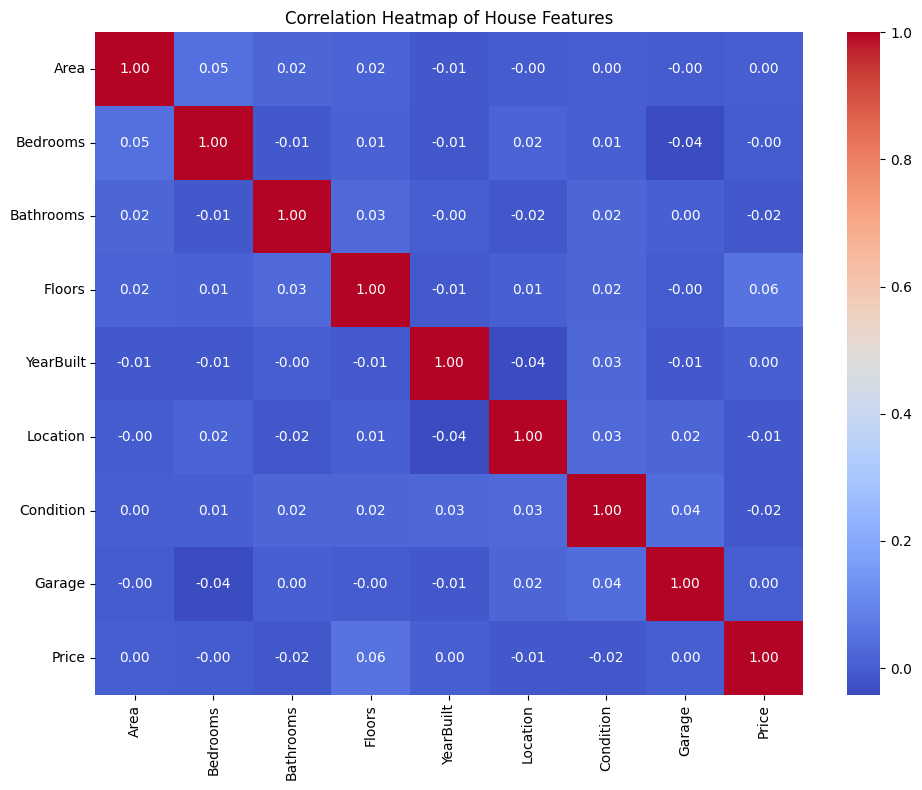

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of House Features')
plt.tight_layout()
plt.show()

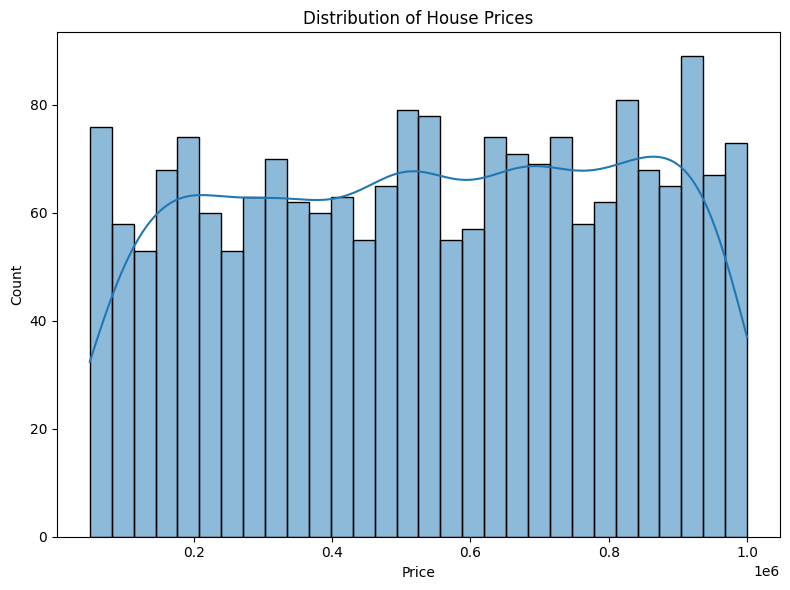

In [7]:
# Distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

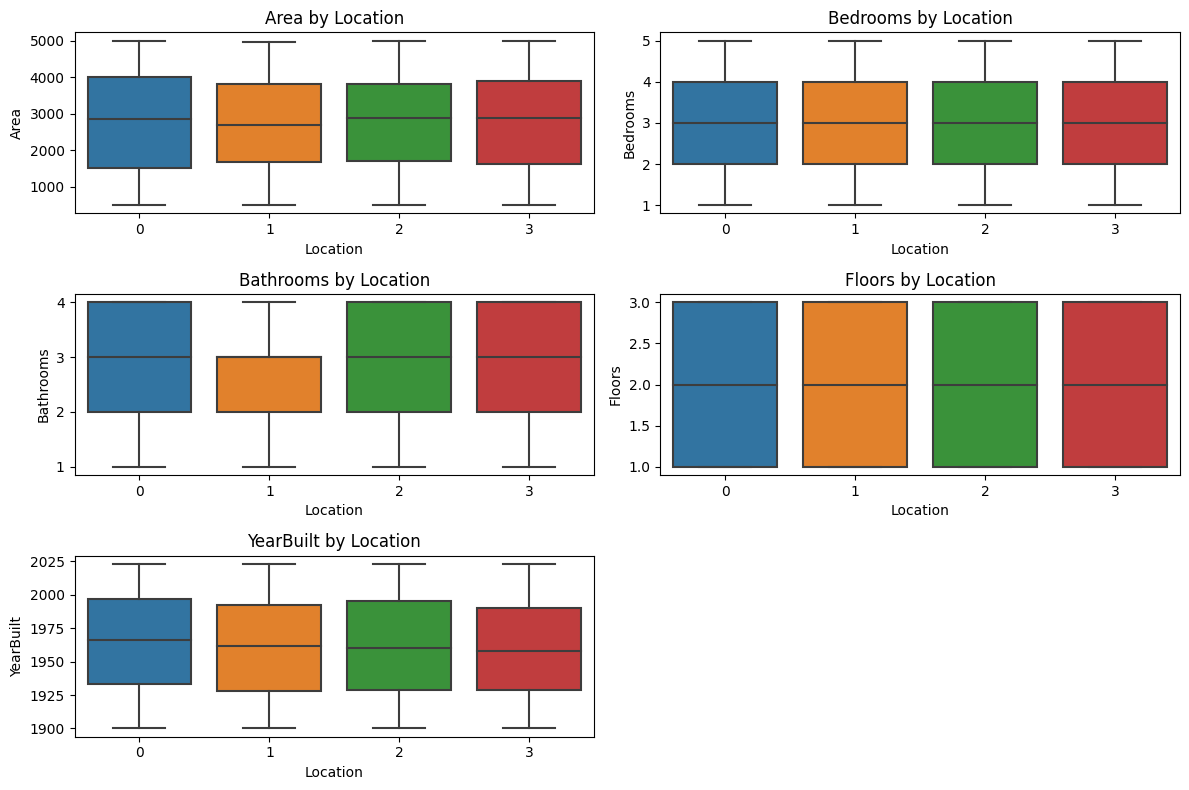

In [8]:
# Feature distributions by Location
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Location', y=col, data=data)
    plt.title(f'{col} by Location')
plt.tight_layout()
plt.show()

In [9]:
# Prepare features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

In [10]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'\nMean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 245138.91
Root Mean Squared Error: 283970.40


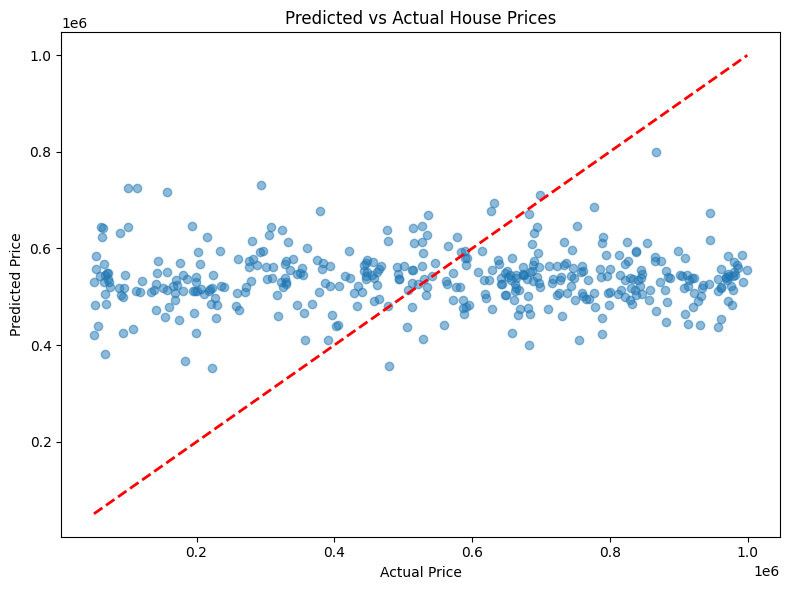

In [11]:
# Visualize Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual House Prices')
plt.tight_layout()
plt.show()


Feature Importance:
      Feature  Importance
0       Area    0.441022
4  YearBuilt    0.213741
2  Bathrooms    0.085456
1   Bedrooms    0.083182
5   Location    0.067013
6  Condition    0.065599
3     Floors    0.038702
7     Garage    0.005284


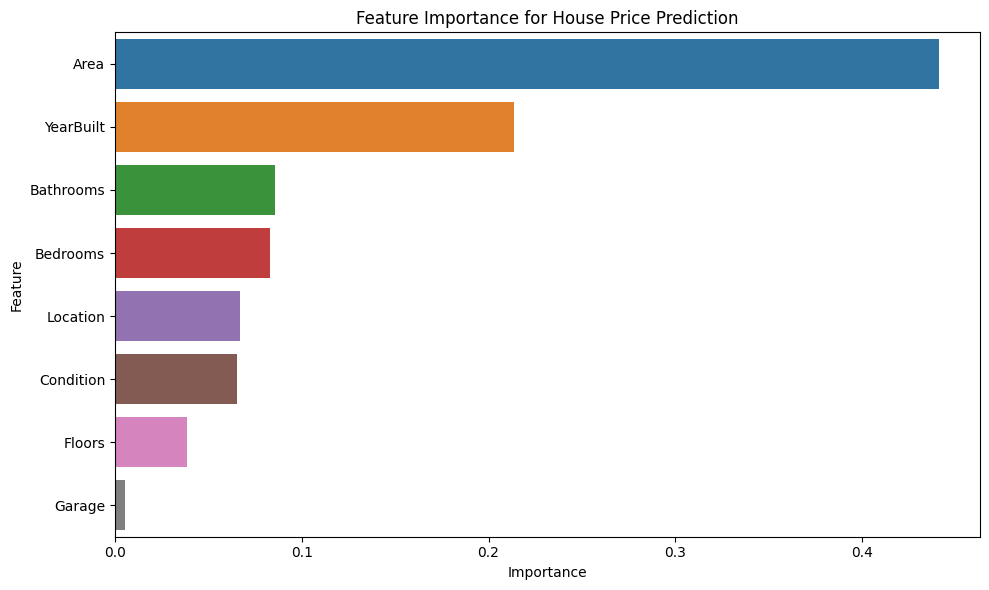

In [12]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for House Price Prediction')
plt.tight_layout()
plt.show()